In [7]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np



In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
y_train = to_categorical(y_train, num_classes=10)


X_test = X_test.astype('float32')
y_test = to_categorical(y_test, num_classes=10)

X_train /= 255
X_test /= 255

In [10]:
model = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [11]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 16s - loss: 1.6977 - accuracy: 0.3861 - val_loss: 1.4181 - val_accuracy: 0.4893
Epoch 2/30
 - 16s - loss: 1.3142 - accuracy: 0.5305 - val_loss: 1.2450 - val_accuracy: 0.5644
Epoch 3/30
 - 16s - loss: 1.1783 - accuracy: 0.5810 - val_loss: 1.2446 - val_accuracy: 0.5586
Epoch 4/30
 - 16s - loss: 1.0911 - accuracy: 0.6144 - val_loss: 1.1451 - val_accuracy: 0.6026
Epoch 5/30
 - 16s - loss: 1.0277 - accuracy: 0.6390 - val_loss: 1.1099 - val_accuracy: 0.6165
Epoch 6/30
 - 16s - loss: 0.9794 - accuracy: 0.6522 - val_loss: 1.1243 - val_accuracy: 0.6109
Epoch 7/30
 - 16s - loss: 0.9299 - accuracy: 0.6721 - val_loss: 1.1874 - val_accuracy: 0.5965
Epoch 8/30
 - 16s - loss: 0.8968 - accuracy: 0.6843 - val_loss: 1.1889 - val_accuracy: 0.6037
Epoch 9/30
 - 16s - loss: 0.8614 - accuracy: 0.6935 - val_loss: 1.1717 - val_accuracy: 0.6131
Epoch 10/30
 - 16s - loss: 0.8280 - accuracy: 0.7070 - val_loss: 1.2405 - val_accuracy: 0.6034
Epoch 11

In [12]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
sgd2 = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd2)

In [14]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 31s - loss: 1.6682 - accuracy: 0.3904 - val_loss: 1.3650 - val_accuracy: 0.5065
Epoch 2/30
 - 33s - loss: 1.2253 - accuracy: 0.5666 - val_loss: 1.1363 - val_accuracy: 0.6036
Epoch 3/30
 - 32s - loss: 1.0376 - accuracy: 0.6330 - val_loss: 1.0725 - val_accuracy: 0.6246
Epoch 4/30
 - 33s - loss: 0.9005 - accuracy: 0.6859 - val_loss: 0.9735 - val_accuracy: 0.6637
Epoch 5/30
 - 31s - loss: 0.8026 - accuracy: 0.7185 - val_loss: 0.9352 - val_accuracy: 0.6771
Epoch 6/30
 - 34s - loss: 0.7219 - accuracy: 0.7438 - val_loss: 0.9187 - val_accuracy: 0.6830
Epoch 7/30
 - 32s - loss: 0.6416 - accuracy: 0.7738 - val_loss: 1.0194 - val_accuracy: 0.6581
Epoch 8/30
 - 33s - loss: 0.5893 - accuracy: 0.7926 - val_loss: 1.0175 - val_accuracy: 0.6769
Epoch 9/30
 - 33s - loss: 0.5320 - accuracy: 0.8105 - val_loss: 0.9730 - val_accuracy: 0.6889
Epoch 10/30
 - 32s - loss: 0.4785 - accuracy: 0.8296 - val_loss: 1.0154 - val_accuracy: 0.6933
Epoch 11/

In [54]:
model_dropout = [0] * 4
for j in range(4):
    
    model_dropout[j] = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout((j+2) * 0.1),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout((j+2) * 0.1),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout((j+2) * 0.1),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout((j+2) * 0.1),


        Dense(10, activation='softmax')
    ])
    
sgd_dropout = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



In [58]:
his = []
for j in range(4):
    model_dropout[j].compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd_dropout)
    his_ = model_dropout[j].fit(X_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)
    his.append(his_)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 37s - loss: 0.8162 - accuracy: 0.7150 - val_loss: 0.8211 - val_accuracy: 0.7167
Epoch 2/20
 - 41s - loss: 0.7984 - accuracy: 0.7194 - val_loss: 0.7789 - val_accuracy: 0.7290
Epoch 3/20
 - 43s - loss: 0.7999 - accuracy: 0.7214 - val_loss: 0.7644 - val_accuracy: 0.7392
Epoch 4/20
 - 44s - loss: 0.7959 - accuracy: 0.7226 - val_loss: 0.7923 - val_accuracy: 0.7269
Epoch 5/20
 - 40s - loss: 0.7863 - accuracy: 0.7260 - val_loss: 0.7808 - val_accuracy: 0.7345
Epoch 6/20
 - 40s - loss: 0.7830 - accuracy: 0.7265 - val_loss: 0.8338 - val_accuracy: 0.7147
Epoch 7/20
 - 41s - loss: 0.7723 - accuracy: 0.7290 - val_loss: 0.7740 - val_accuracy: 0.7346
Epoch 8/20
 - 40s - loss: 0.7733 - accuracy: 0.7321 - val_loss: 0.7858 - val_accuracy: 0.7308
Epoch 9/20
 - 40s - loss: 0.7645 - accuracy: 0.7333 - val_loss: 0.7666 - val_accuracy: 0.7399
Epoch 10/20
 - 38s - loss: 0.7638 - accuracy: 0.7329 - val_loss: 0.7890 - val_accuracy: 0.7382
Epoch 11/

In [64]:
model_tuning_dense = [0] * 4
for j in range(4):
    
    model_tuning_dense[j] = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        Flatten(),
        
        Dense(2**(j+5), activation='relu'),

        Dense(10, activation='softmax')
    ])
    
sgd_tuning_dense = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [66]:
his_tuning_dense = []
for j in range(4):
    model_tuning_dense[j].compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd_dropout)
    his_ = model_tuning_dense[j].fit(X_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)
    his_tuning_dense.append(his_)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 33s - loss: 1.7458 - accuracy: 0.3544 - val_loss: 1.4024 - val_accuracy: 0.4941
Epoch 2/20
 - 36s - loss: 1.3000 - accuracy: 0.5343 - val_loss: 1.2358 - val_accuracy: 0.5706
Epoch 3/20
 - 39s - loss: 1.1155 - accuracy: 0.6061 - val_loss: 1.1020 - val_accuracy: 0.6184
Epoch 4/20
 - 42s - loss: 0.9909 - accuracy: 0.6537 - val_loss: 1.1184 - val_accuracy: 0.6118
Epoch 5/20
 - 35s - loss: 0.9011 - accuracy: 0.6837 - val_loss: 1.0050 - val_accuracy: 0.6610
Epoch 6/20
 - 39s - loss: 0.8205 - accuracy: 0.7134 - val_loss: 0.9864 - val_accuracy: 0.6648
Epoch 7/20
 - 39s - loss: 0.7472 - accuracy: 0.7395 - val_loss: 0.9673 - val_accuracy: 0.6793
Epoch 8/20
 - 39s - loss: 0.6966 - accuracy: 0.7576 - val_loss: 0.9419 - val_accuracy: 0.6903
Epoch 9/20
 - 39s - loss: 0.6359 - accuracy: 0.7775 - val_loss: 0.9874 - val_accuracy: 0.6811
Epoch 10/20
 - 39s - loss: 0.5968 - accuracy: 0.7898 - val_loss: 1.0130 - val_accuracy: 0.6757
Epoch 11/

## 1 Performance of the initial network

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy',score[1])

Test accuracy 0.5817000269889832


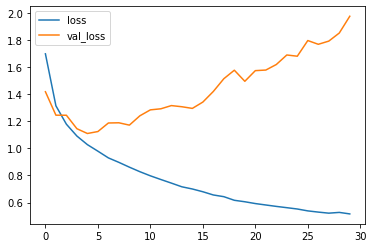

In [44]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

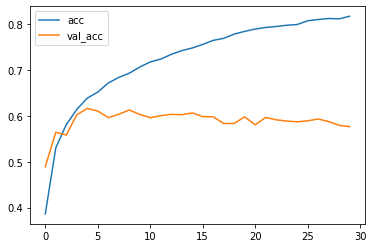

In [46]:
plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

## 2 Second model performance

In [47]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy',score2[1])

Test accuracy 0.6743000149726868


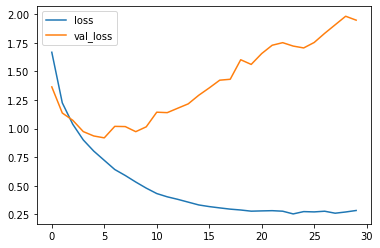

In [48]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

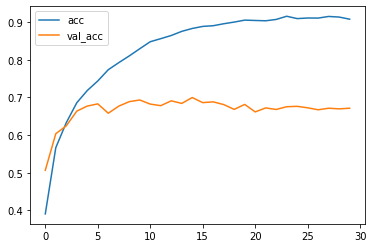

In [49]:
plt.plot(history2.history['accuracy'], label='acc')
plt.plot(history2.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

## 3 Adding dropout layer

Text(0.5, 1.0, '0.5')

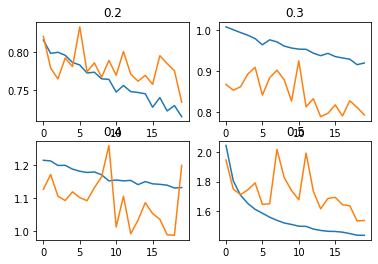

In [59]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(his[0].history['loss'], label='loss')
axs[0, 0].plot(his[0].history['val_loss'], label = 'val_loss')
axs[0, 0].set_title('0.2')

axs[0, 1].plot(his[1].history['loss'], label='loss')
axs[0, 1].plot(his[1].history['val_loss'], label = 'val_loss')
axs[0, 1].set_title('0.3')

axs[1, 0].plot(his[2].history['loss'], label='loss')
axs[1, 0].plot(his[2].history['val_loss'], label = 'val_loss')
axs[1, 0].set_title('0.4')

axs[1, 1].plot(his[3].history['loss'], label='loss')
axs[1, 1].plot(his[3].history['val_loss'], label = 'val_loss')
axs[1, 1].set_title('0.5')

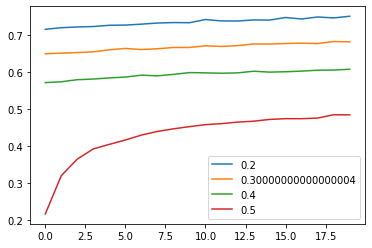

In [60]:
for i in range(4):
    plt.plot(his[i].history['accuracy'], label= (i+2)*0.1)
plt.legend()
plt.show()

In [61]:
score02 = model_dropout[0].evaluate(X_test, y_test, verbose=0)
print('Test accuracy',score02[1])

Test accuracy 0.7461000084877014


## 3 Tuning Dense units

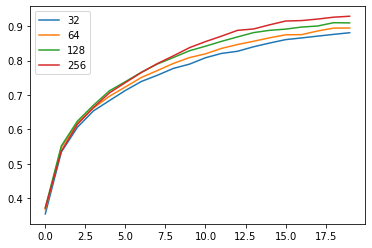

In [71]:
plt.plot(his_tuning_dense[0].history['accuracy'], label='32')
plt.plot(his_tuning_dense[1].history['accuracy'], label='64')
plt.plot(his_tuning_dense[2].history['accuracy'], label='128')
plt.plot(his_tuning_dense[3].history['accuracy'], label='256')
plt.legend()
plt.show()